In [1]:
import tensorflow

In [2]:
print(tensorflow.__version__)

2.6.0


In [3]:
#mounting the google drive for importing the data 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls gdrive/MyDrive


'Colab Notebooks'   GDToT   pneumonia-xray-images.zip  'Power BI Showcases'


In [5]:
!unzip gdrive/MyDrive/pneumonia-xray-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/normal/IM-0435-0001-0001.jpeg  
  inflating: train/normal/IM-0435-0001.jpeg  
  inflating: train/normal/IM-0437-0001-0001.jpeg  
  inflating: train/normal/IM-0437-0001-0002.jpeg  
  inflating: train/normal/IM-0437-0001.jpeg  
  inflating: train/normal/IM-0438-0001.jpeg  
  inflating: train/normal/IM-0439-0001-0001.jpeg  
  inflating: train/normal/IM-0439-0001-0002.jpeg  
  inflating: train/normal/IM-0439-0001.jpeg  
  inflating: train/normal/IM-0440-0001.jpeg  
  inflating: train/normal/IM-0441-0001.jpeg  
  inflating: train/normal/IM-0442-0001.jpeg  
  inflating: train/normal/IM-0444-0001.jpeg  
  inflating: train/normal/IM-0445-0001.jpeg  
  inflating: train/normal/IM-0446-0001.jpeg  
  inflating: train/normal/IM-0447-0001.jpeg  
  inflating: train/normal/IM-0448-0001.jpeg  
  inflating: train/normal/IM-0449-0001.jpeg  
  inflating: train/normal/IM-0450-0001.jpeg  
  inflating: train/normal/IM-0451-0001.jpeg  
  in

In [6]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
#setting the training data directory
DataDir= r"train/"

In [8]:
# intiallizing the category of classification
CATEGORIES=["normal","opacity"]

In [9]:
! ls test

normal	opacity


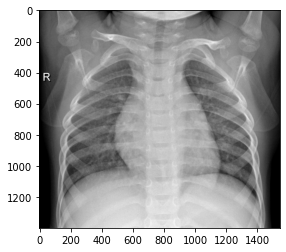

In [10]:
#converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [11]:
#intializing the size of the image so that every image should be in same dimension
img_size=100

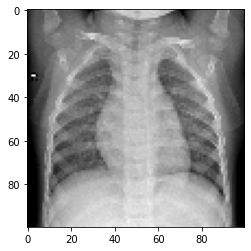

In [12]:
#image after resize and gray scale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [13]:
training_data=[]

In [14]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100 
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [15]:
create_training_data()

In [16]:
print(len(training_data))

4192


In [17]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[12, 36, 64, ..., 74, 68, 45],
       [ 9, 34, 66, ..., 69, 67, 47],
       [ 8, 39, 61, ..., 73, 73, 43],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[32, 18, 18, ..., 48, 41, 48],
       [36, 18, 17, ..., 49, 44, 46],
       [31, 18, 17, ..., 49, 44, 42],
       ...,
       [29, 29, 24, ..., 21, 22, 22],
       [29, 29, 24, ..., 21, 22, 22],
       [28, 30, 24, ..., 21, 21, 22]], dtype=uint8), 1]
[array([[ 61,  11,  30, ..., 218, 220, 223],
       [ 26,  15,  32, ..., 220, 219, 224],
       [ 10,  15,  35, ..., 221, 219, 225],
       ...,
       [ 22,  22,  20, ...,  18, 146, 162],
       [ 22,  22,  20, ...,  20, 120, 160],
       [ 22,  22,  21, ...,  25, 133, 180]], dtype=uint8), 1]
[array([[140, 148, 149, ...,  56,  31,  17],
       [144, 146, 146, ...,  53,  26,  16],
       [160, 144, 146, ...,  48,  23,  15],
       ...,
       [  0,   0,   0, ...,   0,   0,   0]

In [18]:

X=[]
y=[]

In [19]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [20]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[12]
   [36]
   [64]
   ...
   [74]
   [68]
   [45]]

  [[ 9]
   [34]
   [66]
   ...
   [69]
   [67]
   [47]]

  [[ 8]
   [39]
   [61]
   ...
   [73]
   [73]
   [43]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [21]:
y = np.array(y)

In [22]:
# reshapping the features for making it compatible with tensorflow
X=np.array(X).reshape(-1,img_size,img_size,1)


In [23]:
#as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= r"val/"

In [24]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [25]:
create_validating_data()
print(len(validation_data))

1040


In [26]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  0,   0,   3, ..., 109,  97, 111],
       [  0,   0,   1, ..., 100, 106, 108],
       [  0,   0,   0, ...,  83,  32, 136],
       ...,
       [  0,   0,   0, ...,  79,   3,   0],
       [  0,   0,   0, ...,   1, 253,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[14, 17, 26, ..., 13,  9,  9],
       [14, 25, 31, ..., 12, 10, 13],
       [39, 28, 33, ..., 15, 10, 38],
       ...,
       [ 0,  0,  0, ...,  4,  4,  4],
       [ 0,  0,  0, ...,  4,  4,  4],
       [ 0,  0,  1, ...,  4,  4,  4]], dtype=uint8), 1]
[array([[45, 56, 65, ...,  0,  0,  0],
       [53, 65, 73, ...,  0,  0,  0],
       [62, 70, 82, ...,  0,  0,  0],
       ...,
       [35, 49, 68, ...,  0,  1,  0],
       [37, 51, 65, ...,  0,  0,  0],
       [39, 50, 69, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[ 0,  0,  6, ...,  0,  0,  0],
       [ 8, 15, 18, ..., 14,  2,  0],
       [15, 15, 16, ..., 17, 16, 12],
       ...,
       [ 0,  0, 11, ...,  2,  5,  5],
       [ 4,  0, 18, ..

In [27]:
X_val=[]
y_val=[]

In [28]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [29]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)


In [30]:
# importing the library for training the mode and adding the neural network layers

In [31]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import pickle

In [32]:
from keras.layers import Conv2D,MaxPooling2D

In [33]:

X=X/255.0
x_val=X_val/255.0

In [34]:
X.shape

(4192, 100, 100, 1)

In [35]:
x_val.shape

(1040, 100, 100, 1)

In [36]:
#intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [37]:
model.summary()
#summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1048/1048 [==============================] - 48s 15ms/step - loss: 0.2926 - accuracy: 0.8836 - val_loss: 0.1645 - val_accuracy: 0.9365
Epoch 2/10
1048/1048 [==============================] - 15s 15ms/step - loss: 0.1492 - accuracy: 0.9463 - val_loss: 0.1310 - val_accuracy: 0.9538
Epoch 3/10
1048/1048 [==============================] - 15s 15ms/step - loss: 0.1272 - accuracy: 0.9535 - val_loss: 0.1836 - val_accuracy: 0.9317
Epoch 4/10
1048/1048 [==============================] - 15s 15ms/step - loss: 0.1153 - accuracy: 0.9547 - val_loss: 0.1469 - val_accuracy: 0.9471
Epoch 5/10
1048/1048 [==============================] - 15s 14ms/step - loss: 0.1001 - accuracy: 0.9633 - val_loss: 0.0982 - val_accuracy: 0.9606
Epoch 6/10
1048/1048 [==============================] - 15s 14ms/step - loss: 0.0907 - accuracy: 0.9654 - val_loss: 0.1069 - val_accuracy: 0.9615
Epoch 7/10
1048/1048 [==============================] - 15s 15ms/step - loss: 0.0873 - accuracy: 0.9671 - val_loss: 0.0963 -

In [40]:
# saving the model
model.save(r"model_10.h5")

In [41]:
# importing the library for testing the model

In [42]:
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [43]:
CATEGORIES=["normal","opacity"]

In [44]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [45]:

model = tf.keras.models.load_model(r"model_10.h5")

In [46]:
image=r'test/normal/NORMAL2-IM-0110-0001.jpeg'

In [47]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

[[0.9967829]]
1
opacity


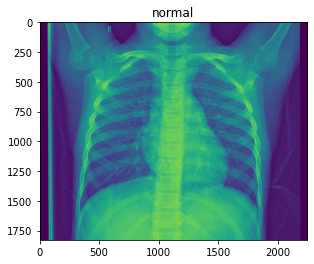

In [48]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()